Modern portfolio theory considers the Mean-Variance optimization problem, where capital should be allocated across investments that maximize expected return and minimimize volatility (variance in return).

If we assume that return = citation rates, then this kind of analysis will likely predict that optimality is just highest density. But it's worth actually visualizing our data first, so let's try that.

In [2]:
import scipy
import pandas as pd
import plotnine as pn
import numpy as np

import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec


from tqdm import tqdm

In [3]:
df_an = pd.read_csv("../../analysis_data/transformed_all_data.csv")
df_an

,log_cpy_var,cpy_med,ref_med,year_med,cpy_mean,cpy_std,log_cpy_mean,log_cpy_std,density_bin,log_cpy_var_z,...,log_cpy_mean_z,log_cpy_std_z,density_bin_z,field,vectorizer,min_distances,optimality,min_distances_z,optimality_z,type
0,0.331658,4.000000,72.0,2010.0,7.534034,12.089618,0.631406,0.575897,19.726,1.661417,...,-2.025220,1.591133,-2.786181,Physics,GPT2,NaN,NaN,NaN,NaN,observed
1,0.246754,5.000000,82.0,2013.0,9.497680,13.469544,0.779184,0.496743,168.476,-0.116948,...,-0.049227,-0.069717,-2.514635,Physics,GPT2,NaN,NaN,NaN,NaN,observed
2,0.293499,8.100000,79.5,2012.0,13.417866,17.592359,0.905548,0.541756,273.329,0.862168,...,1.640431,0.874761,-2.323225,Physics,GPT2,NaN,NaN,NaN,NaN,observed
3,0.213240,5.705882,64.0,2011.0,11.365147,14.639032,0.839308,0.461779,358.318,-0.818917,...,0.754707,-0.803352,-2.168076,Physics,GPT2,NaN,NaN,NaN,NaN,observed
4,0.235837,8.000000,76.0,2011.0,11.854839,14.505224,0.870276,0.485631,422.550,-0.345596,...,1.168796,-0.302877,-2.050819,Physics,GPT2,NaN,NaN,NaN,NaN,observed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4704,0.253087,1.708333,27.0,2012.0,3.040437,4.838242,0.248731,0.503078,46.861,-1.418125,...,1.044214,-1.540146,1.259609,Mathematics,SciBERT,NaN,NaN,NaN,NaN,dominant
4705,0.271216,1.500000,27.0,2011.5,3.051972,4.762593,0.265609,0.520784,46.542,-1.197499,...,1.308136,-1.270974,1.213454,Mathematics,SciBERT,NaN,NaN,NaN,NaN,dominant
4706,0.274933,1.625000,25.5,2013.0,3.159023,4.285971,0.278522,0.524340,48.803,-1.152274,...,1.510057,-1.216920,1.540596,Mathematics,SciBERT,NaN,NaN,NaN,NaN,dominant
4707,0.429860,1.366667,26.5,2011.0,4.613566,10.188415,0.287298,0.655637,35.698,0.733139,...,1.647282,0.779015,-0.355558,Mathematics,SciBERT,NaN,NaN,NaN,NaN,dominant


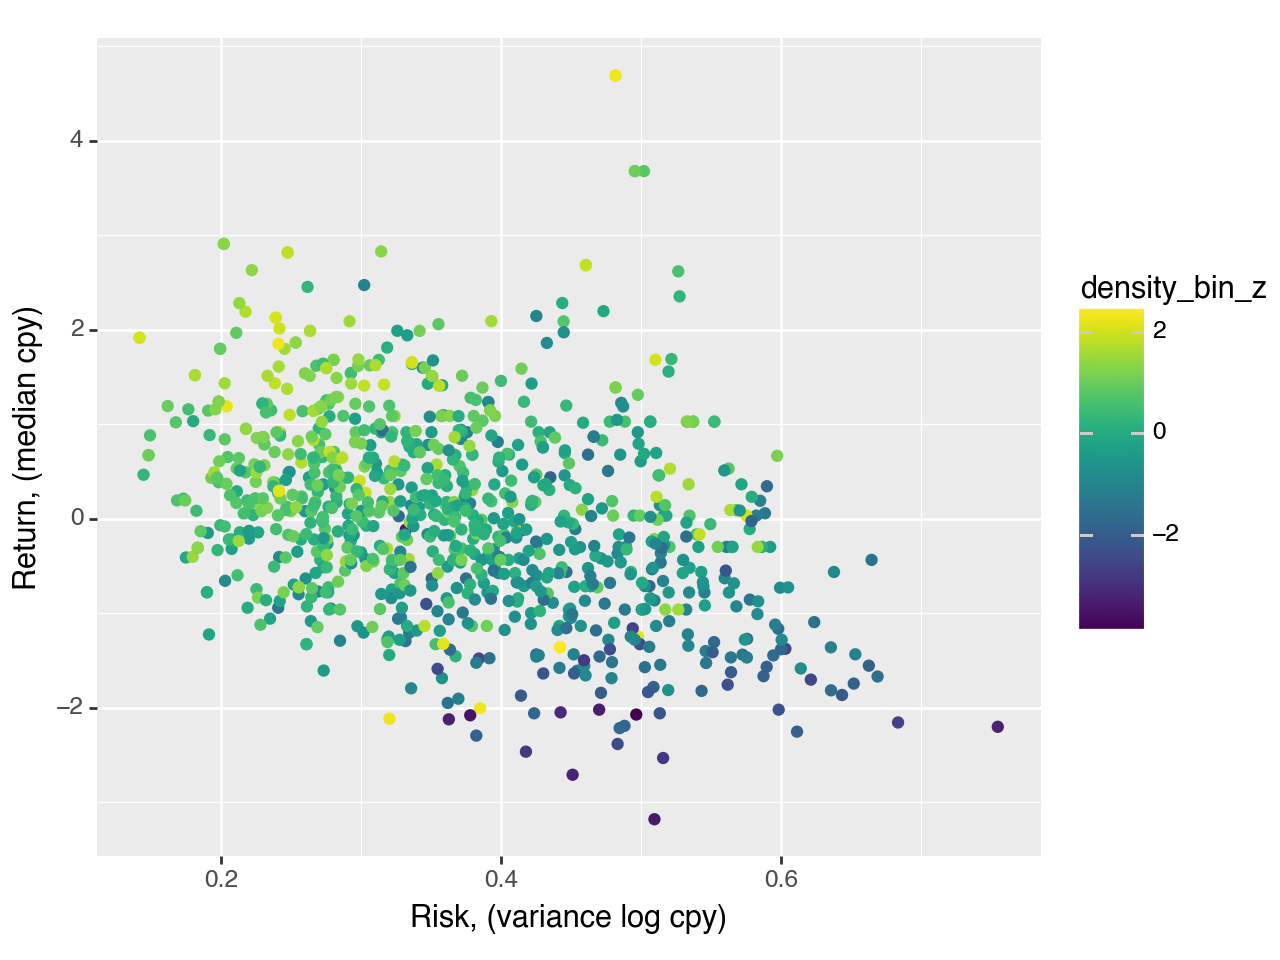

<Figure Size: (640 x 480)>

In [4]:
# Restrict to single vectorizer, (field)
df = df_an[df_an["vectorizer"] == "SciBERT"]

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med_z", # median return
            color="density_bin_z", # 
        ),
    )
    + pn.geom_point()
    # + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

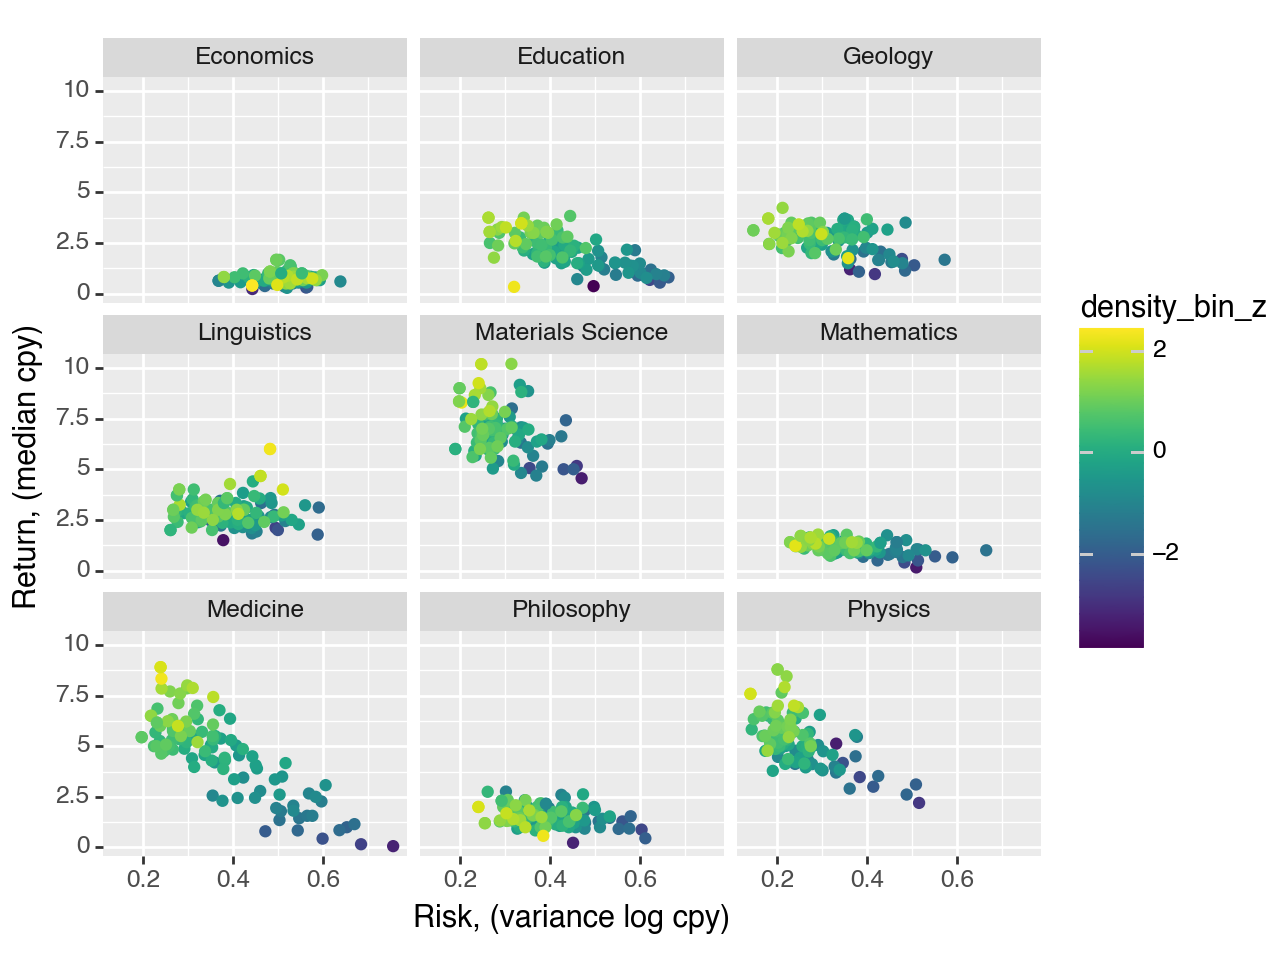

<Figure Size: (640 x 480)>

In [5]:
# Restrict to single vectorizer, (field)
df = df_an[df_an["vectorizer"] == "SciBERT"]

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="density_bin_z", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

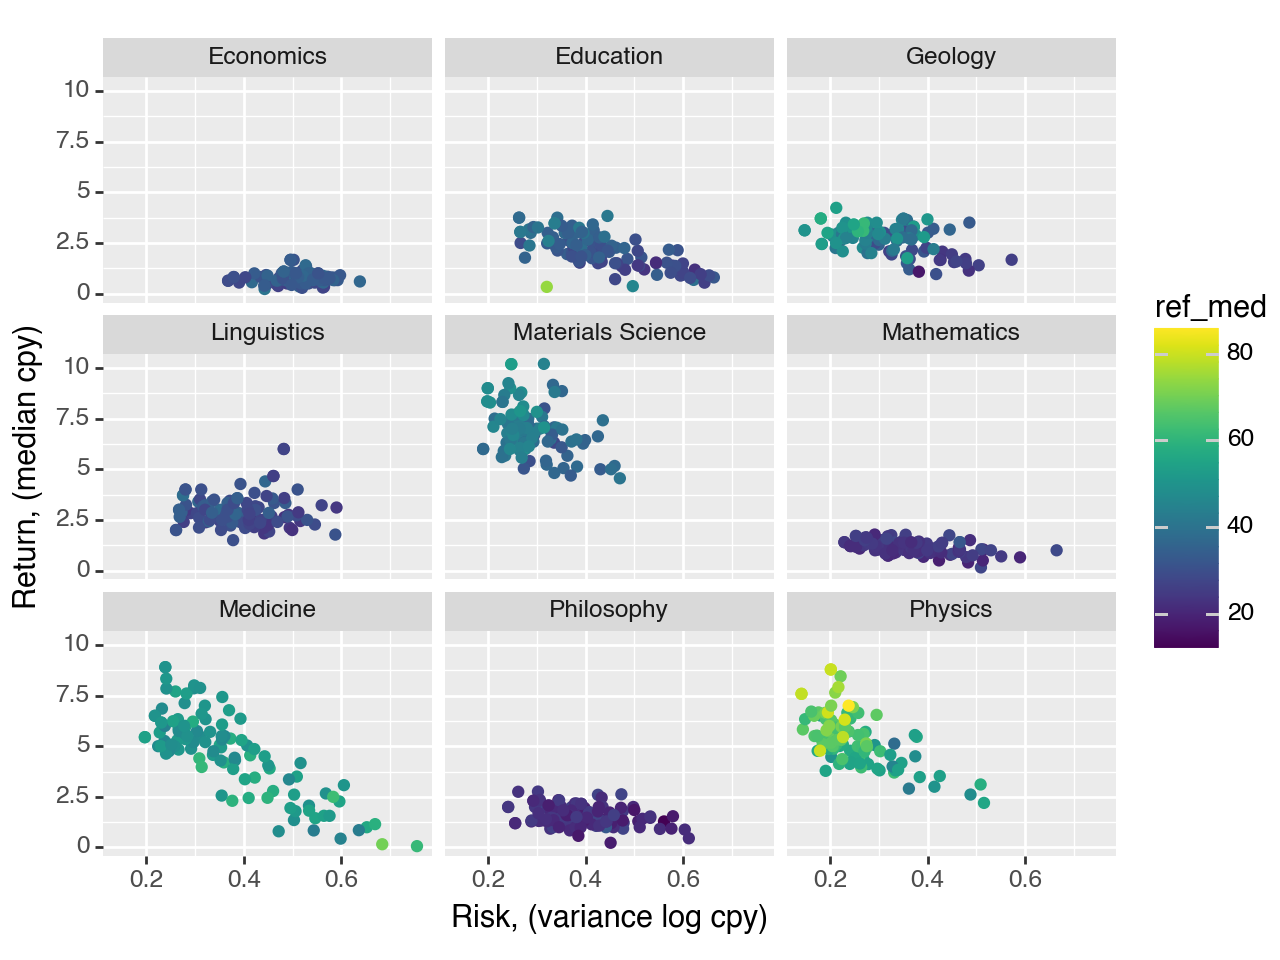

<Figure Size: (640 x 480)>

In [6]:

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="ref_med", # using z-score weakens trends, so omit to be charitable
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

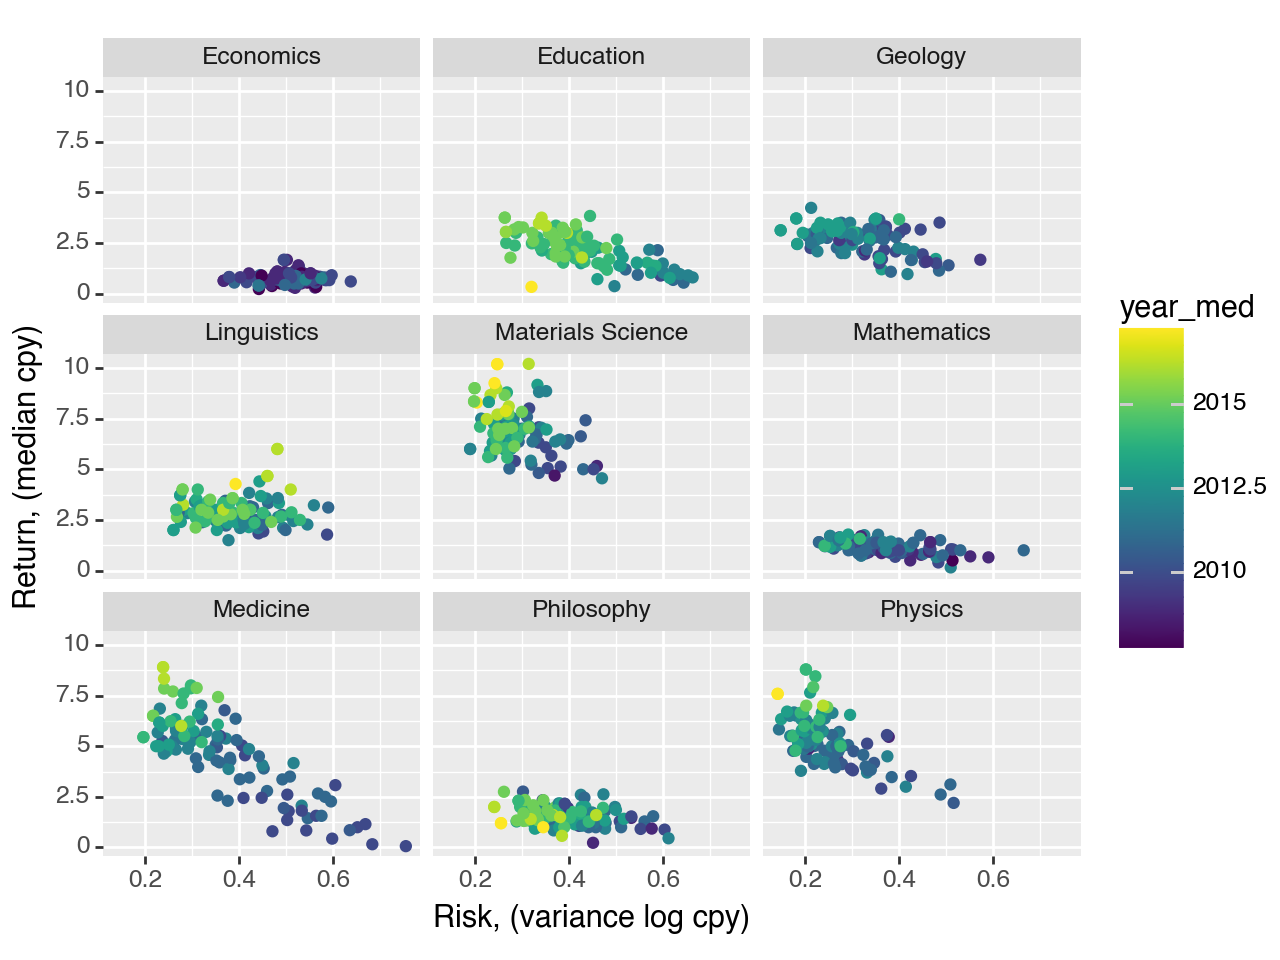

<Figure Size: (640 x 480)>

In [7]:

(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="year_med", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

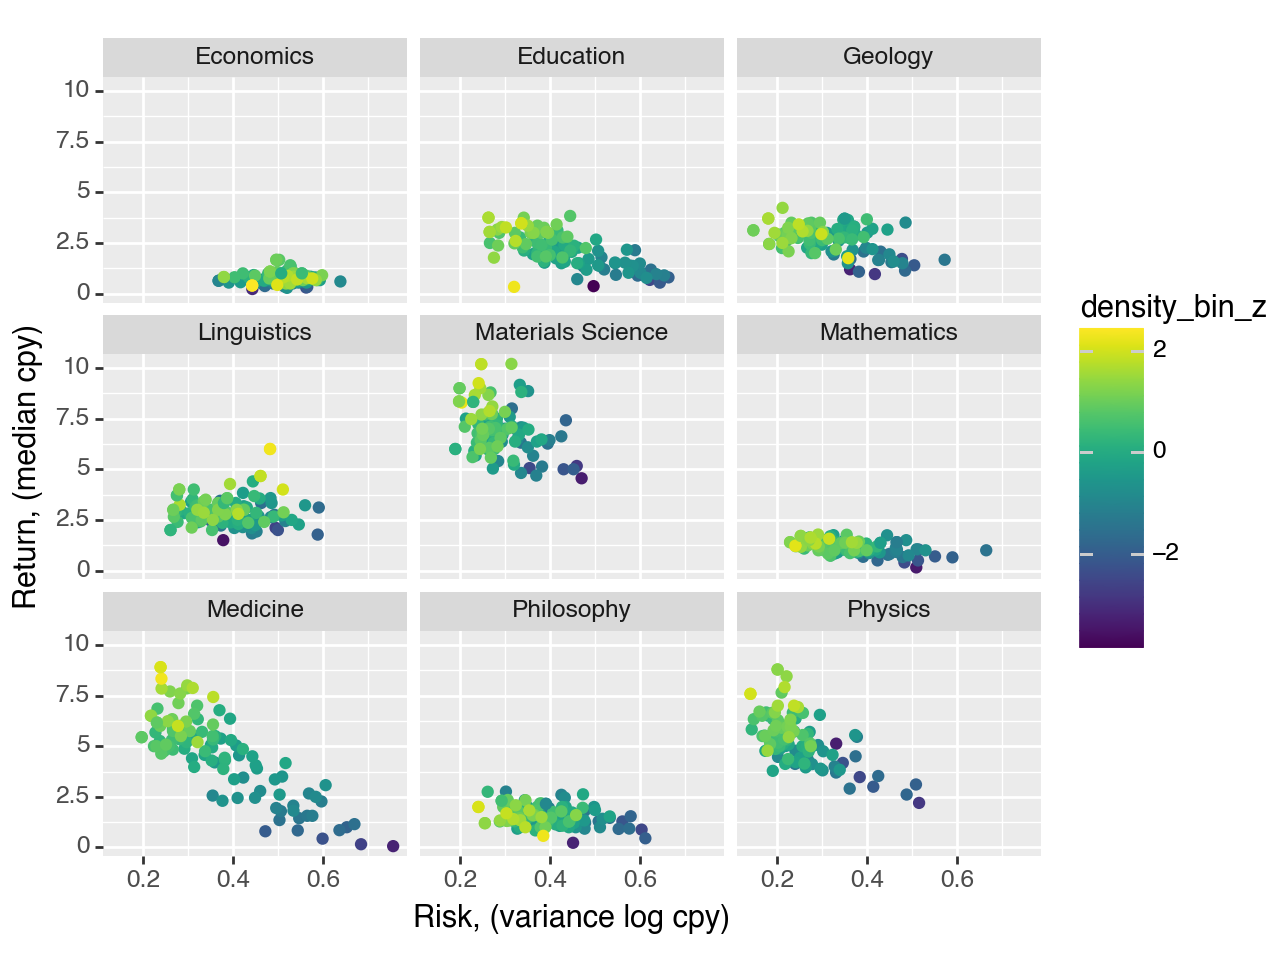

<Figure Size: (640 x 480)>

In [8]:
(
    pn.ggplot(
        df,
        pn.aes(
            x="log_cpy_var", # var return
            y="cpy_med", # median return
            color="density_bin_z", # 
        )
    )
    + pn.geom_point()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)

In [ ]:
(
    pn.ggplot(
        df,
        pn.aes(
            x="density_bin_z", # 
            y="optimality_z"
        )
    )
    + pn.geom_point()
    + pn.geom_smooth()
    + pn.facet_wrap("field")
    + pn.xlab("Risk, (variance log cpy)")
    + pn.ylab("Return, (median cpy)")
)